In [1]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE, ADASYN
import warnings
warnings.filterwarnings("ignore")
# === 1. Load data ===

df = pd.read_excel("Data_Set_(A+B).xlsx")
df_test = pd.read_excel("Data_Set_C.xlsx")


df['Type'] = df['Type'].apply(lambda x: 1 if x == 5 else 0)
df_test['Type'] = df_test['Type'].apply(lambda x: 1 if x == 5 else 0)

In [20]:
# === 2. Select input features V1 ===
features = ['N1', 'N2', 'N3', 'I1', 'I2', 'I3', 'gx', 'gy', 'gz', 'ax', 'ay', 'az']
X = df[features]
Y = df['Type']

# Test set
X_test = df_test[features]
Y_test = df_test['Type']

# === New: Training data sorted by Type ===
# Merge features and labels, sort by 'Type'
train_data = X.copy()
train_data['Type'] = Y.values  # Add the label column

# Sort by 'Type' in ascending order
train_data_sorted = train_data.sort_values(by='Type').reset_index(drop=True)

# Separate the sorted X and Y
X_sorted = train_data_sorted.drop(columns='Type')
Y_sorted = train_data_sorted['Type']

In [25]:
# === 3. Customizable layer structure training function ===
def train_mlp(X, Y, hidden_layers=(50,), activation='relu', solver='adam', max_iter=300, cv=3):
    print(f"Using hidden layer structure: {hidden_layers}")
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layers, activation=activation,
                        solver=solver, max_iter=max_iter, random_state=42)
    # Calculate cross-validation evaluation metrics
    accuracy_scores = cross_val_score(mlp, X, Y, cv=cv, scoring='accuracy')
    f1_scores = cross_val_score(mlp, X, Y, cv=cv, scoring='f1_macro')
    precision_scores = cross_val_score(mlp, X, Y, cv=cv, scoring='precision_macro')
    recall_scores = cross_val_score(mlp, X, Y, cv=cv, scoring='recall_macro')

    print(f"Cross-validation accuracy: {accuracy_scores.mean():.4f} (Standard deviation: {accuracy_scores.std():.4f})")
    print(f"Cross-validation F1 score: {f1_scores.mean():.4f} (Standard deviation: {f1_scores.std():.4f})")
    print(f"Cross-validation precision: {precision_scores.mean():.4f} (Standard deviation: {precision_scores.std():.4f})")
    print(f"Cross-validation recall: {recall_scores.mean():.4f} (Standard deviation: {recall_scores.std():.4f})")

    return mlp.fit(X, Y)



# Training on original data
Using hidden layer structure: (128, 64, 32)
Cross-validation accuracy: 0.7785 (Standard deviation: 0.0232)
Cross-validation F1 score: 0.4611 (Standard deviation: 0.0370)
Cross-validation precision: 0.4810 (Standard deviation: 0.1208)
Cross-validation recall: 0.4996 (Standard deviation: 0.0256)


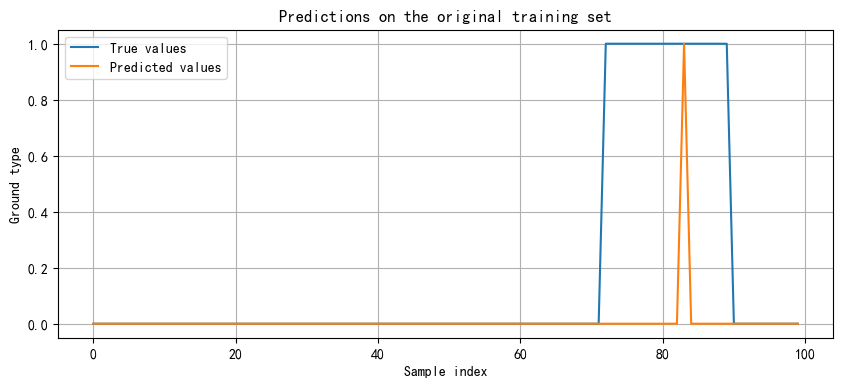

Cross-validation F1 score: 0.4611
Cross-validation accuracy score: 0.7785
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       140
           1       1.00      0.06      0.11        36

    accuracy                           0.81       176
   macro avg       0.90      0.53      0.50       176
weighted avg       0.84      0.81      0.73       176



In [47]:
# === Plotting function ===
def plot_results(y_true, y_pred, title):
    plt.figure(figsize=(10, 4))
    plt.plot(y_true[:100], label='True values')
    plt.plot(y_pred[:100], label='Predicted values')
    plt.title(title)
    plt.xlabel("Sample index")
    plt.ylabel("Ground type")
    plt.legend()
    plt.grid(True)
    plt.show()

# === 4. Training on original data ===
print("# Training on original data")
model_raw = train_mlp(X, Y, hidden_layers=( 128,64,32), activation='tanh', solver='adam', max_iter=300)
pred_raw = model_raw.predict(X)
plot_results(Y.values, pred_raw, "Predictions on the original training set")
print("Cross-validation F1 score: {:.4f}".format(cross_val_score(model_raw, X, Y, cv=3, scoring='f1_macro').mean()))
print("Cross-validation accuracy score: {:.4f}".format(cross_val_score(model_raw, X, Y, cv=3, scoring='accuracy').mean()))
print(classification_report(Y, pred_raw))


# Training on sorted data
Using hidden layer structure: (128, 64, 32)
Cross-validation accuracy: 0.7898 (Standard deviation: 0.0073)
Cross-validation F1 score: 0.4413 (Standard deviation: 0.0023)
Cross-validation precision: 0.3971 (Standard deviation: 0.0008)
Cross-validation recall: 0.4965 (Standard deviation: 0.0050)


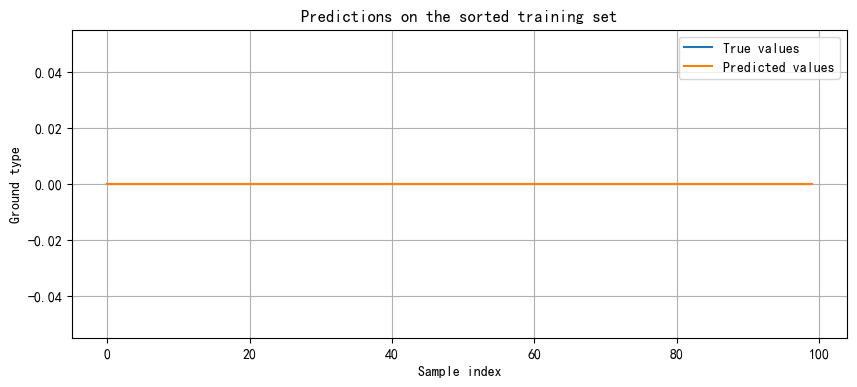

Cross-validation F1 score: 0.4611
Cross-validation accuracy score: 0.7785
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       140
           1       1.00      0.06      0.11        36

    accuracy                           0.81       176
   macro avg       0.90      0.53      0.50       176
weighted avg       0.84      0.81      0.73       176



In [59]:
# === 5. Training on sorted data ===
print("# Training on sorted data")
model_sorted = train_mlp(X_sorted, Y_sorted, hidden_layers=(128, 64, 32), activation='tanh', solver='adam', max_iter=300)
pred_sorted = model_sorted.predict(X_sorted)
plot_results(Y_sorted.values, pred_sorted, "Predictions on the sorted training set")
print("Cross-validation F1 score: {:.4f}".format(cross_val_score(model_raw, X, Y, cv=3, scoring='f1_macro').mean()))
print("Cross-validation accuracy score: {:.4f}".format(cross_val_score(model_raw, X, Y, cv=3, scoring='accuracy').mean()))
print(classification_report(Y, pred_raw))

# Training on normalized data
Using hidden layer structure: (128, 64, 32)
Cross-validation accuracy: 0.7954 (Standard deviation: 0.0017)
Cross-validation F1 score: 0.4430 (Standard deviation: 0.0005)
Cross-validation precision: 0.3977 (Standard deviation: 0.0008)
Cross-validation recall: 0.5000 (Standard deviation: 0.0000)


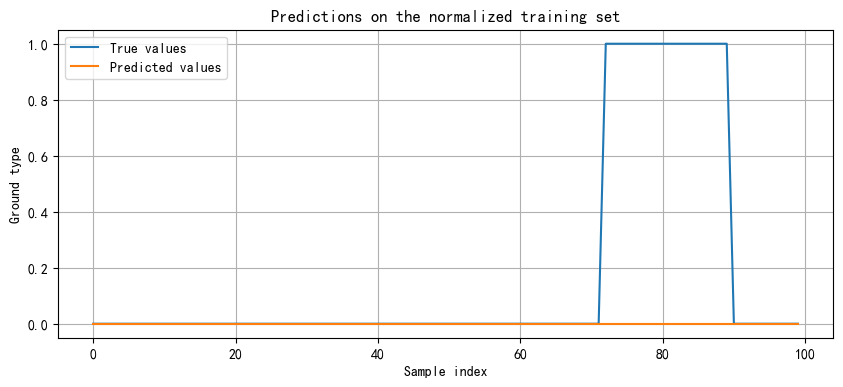

Cross-validation F1 score: 0.4611
Cross-validation accuracy score: 0.7785
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       140
           1       1.00      0.06      0.11        36

    accuracy                           0.81       176
   macro avg       0.90      0.53      0.50       176
weighted avg       0.84      0.81      0.73       176



In [62]:
# === 6. Training on normalized data ===
print("# Training on normalized data")
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
model_norm = train_mlp(X_norm, Y, hidden_layers=(128, 64, 32), activation='tanh', solver='sgd', max_iter=300)
pred_norm = model_norm.predict(X_norm)
plot_results(Y.values, pred_norm, "Predictions on the normalized training set")
print("Cross-validation F1 score: {:.4f}".format(cross_val_score(model_raw, X, Y, cv=3, scoring='f1_macro').mean()))
print("Cross-validation accuracy score: {:.4f}".format(cross_val_score(model_raw, X, Y, cv=3, scoring='accuracy').mean()))
print(classification_report(Y, pred_raw))

# Training with SMOTE balancing
Using hidden layer structure: (128, 64, 32)
Cross-validation accuracy: 0.9321 (Standard deviation: 0.0309)
Cross-validation F1 score: 0.9318 (Standard deviation: 0.0313)
Cross-validation precision: 0.9392 (Standard deviation: 0.0243)
Cross-validation recall: 0.9324 (Standard deviation: 0.0302)


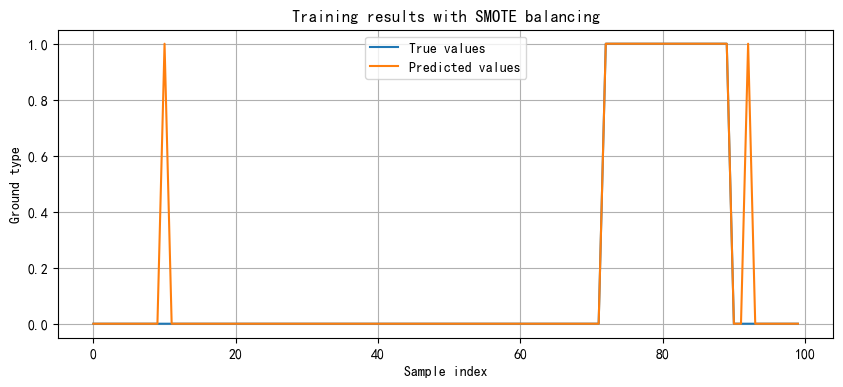

Cross-validation F1 score: 0.4611
Cross-validation accuracy score: 0.7785
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       140
           1       1.00      0.06      0.11        36

    accuracy                           0.81       176
   macro avg       0.90      0.53      0.50       176
weighted avg       0.84      0.81      0.73       176



In [67]:
# === 7. Training with SMOTE balancing ===
print("# Training with SMOTE balancing")
smote = SMOTE(random_state=42, k_neighbors=1)
X_bal, Y_bal = smote.fit_resample(X_norm, Y)
model_bal = train_mlp(X_bal, Y_bal, hidden_layers=(128, 64, 32), activation='relu', solver='adam', max_iter=300)
pred_bal = model_bal.predict(X_bal)
plot_results(Y_bal, pred_bal, "Training results with SMOTE balancing")

print(classification_report(Y, pred_raw))

# Training with TomekLinks balancing
Using hidden layer structure: (128, 64, 32)
Cross-validation accuracy: 0.8133 (Standard deviation: 0.0069)
Cross-validation F1 score: 0.4485 (Standard deviation: 0.0021)
Cross-validation precision: 0.4067 (Standard deviation: 0.0034)
Cross-validation recall: 0.5000 (Standard deviation: 0.0000)


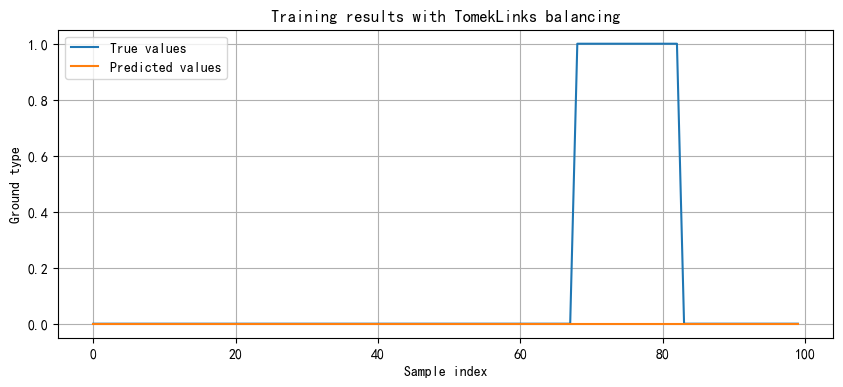

              precision    recall  f1-score   support

           0       0.81      1.00      0.90       135
           1       0.00      0.00      0.00        31

    accuracy                           0.81       166
   macro avg       0.41      0.50      0.45       166
weighted avg       0.66      0.81      0.73       166



In [71]:
from imblearn.under_sampling import TomekLinks
print("# Training with TomekLinks balancing")
tomek = TomekLinks(sampling_strategy='all')  # 'all' means clean the boundary samples of all classes
X_tl, Y_tl = tomek.fit_resample(X_norm, Y)

model_tl = train_mlp(X_tl, Y_tl,
                     hidden_layers=(128, 64, 32),
                     activation='relu',
                     solver='adam',
                    max_iter=300)

pred_tl = model_tl.predict(X_tl)

plot_results(Y_tl, pred_tl, "Training results with TomekLinks balancing")
print(classification_report(Y_tl, pred_tl))

# Validation on test set C


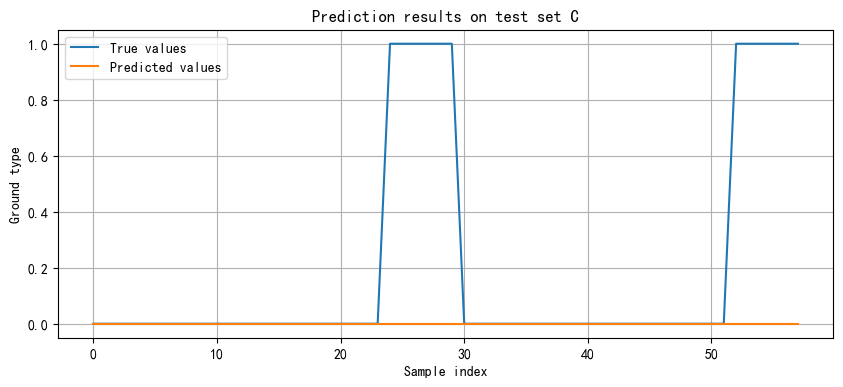

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        46
           1       0.00      0.00      0.00        12

    accuracy                           0.79        58
   macro avg       0.40      0.50      0.44        58
weighted avg       0.63      0.79      0.70        58



In [72]:
# === 8. Validate model generalization on test set C ===
print("# Validation on test set C")
X_test_norm = scaler.transform(X_test)
pred_test = model_tl.predict(X_test_norm)
plot_results(Y_test.values, pred_test, "Prediction results on test set C")
print(classification_report(Y_test, pred_test))